# 🏆 Predict the Introverts from the Extroverts

> Author: H-Z-Ning  
> Date: 2025-07-03  
> Competition Link: [Kaggle Competition Page](https://www.kaggle.com/competitions/playground-series-s5e7)

---

## 📚 Table of Contents

1. [Project Overview](#project-overview)
2. [Environment Setup and Data Loading](#environment-setup-and-data-loading)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
4. [Feature Engineering](#feature-engineering)
5. [Model Training](#model-training)
6. [Model Evaluation](#model-evaluation)
7. [Submission and Conclusion](#submission-and-conclusion)
8. [Future Work](#future-work)

---

## 🧾 Project Overview

This project aims to solve the "Predict the Introverts from the Extroverts" challenge from a Kaggle competition. The approach is divided into two main parts: data analysis and machine learning model development. Below is a breakdown of the tasks involved in each part.

### Data Processing

1. **Data Loading and Inspection:** Load the training and test datasets and visually inspect their distributions.
2. **Correlation Analysis:** Use visualizations to examine the correlation between features and the target, as well as among the features themselves.
3. **Missing Value Analysis and Imputation:** Visually examine the distribution of feature values and analyze their statistical descriptions. For features with a high percentage of missing values, decide whether to impute the missing data.
4. **Feature Engineering:** Remove irrelevant features and create new useful features.
5. **Outlier Removal:** Visually detect and remove outliers from the feature set using plots.

### Machine Learning Model Development

1. **Decision Tree Algorithm**
2. **Random Forest Algorithm**
3. **Ensemble Learning Algorithms**

---


## 💻 Environment Setup and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use("seaborn-v0_8-darkgrid")
warnings.filterwarnings("ignore")
plt.rc("font",family="SimHei",size="15")  
# import csv
train_df = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
datasert_df = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data-backup/personality_datasert.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")


## Data Acquisition and Merging

This section describes how to acquire the datasets and merge them into a single DataFrame for further analysis and modeling.


In [2]:

datasert_df = (
    datasert_df
    .rename(columns={'Personality': 'match_p'})
    .drop_duplicates(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
                      'Going_outside', 'Drained_after_socializing', 
                      'Friends_circle_size', 'Post_frequency'])
)

merge_cols = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
              'Going_outside', 'Drained_after_socializing', 
              'Friends_circle_size', 'Post_frequency']

train_df = train_df.merge(datasert_df, how='left', on=merge_cols)
test_df = test_df.merge(datasert_df, how='left', on=merge_cols)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
 9   match_p                    178 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


## Exploratory Data Analysis (EDA)

### Visual Inspection of Training and Test Data

First, take a look at the training data.

In [3]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
 9   match_p                    178 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


It can be observed that all features have some missing values, but the amount of missing data is relatively small.

Next, use `train_df.head()` to view the values of the first five records.

In [4]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,match_p
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,NaN
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,NaN
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert,NaN
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,NaN
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert,NaN


### Correlation Analysis

Correlation analysis will be conducted using visualizations to observe the relationships between each feature and the target, as well as among the features themselves.

Correlation measures the strength and direction of the relationship between two or more variables. Based on the correlation values, we can assess how strongly variables are related. The algorithm used for this analysis is the **Pearson Correlation Coefficient**.

**Pearson Correlation Coefficient:**  
Measures the linear relationship between variables and is suitable for numerical variables.  
- **Positive Correlation:** When one variable increases, the other also increases. For example, there may be a positive correlation between height and weight.  
- **Negative Correlation:** When one variable increases, the other decreases. For example, there may be a negative correlation between temperature and heating usage.  
- **No Correlation:** No clear relationship between the variables.  

Correlation values typically range from -1 to 1:  
- **1:** Perfect positive correlation  
- **-1:** Perfect negative correlation  
- **0:** No linear correlation  
- **Close to 1 or -1:** Strong correlation  
- **Close to 0:** Weak correlation  

Correlation analysis is conducted using pandas.  
**Note:** Correlation analysis can only be performed on numerical features.

In [5]:
numeric_df = train_df.select_dtypes(include='number').drop(columns=['id'])
numeric_df.corr()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.628806,-0.640884,-0.598014,-0.611544
Social_event_attendance,-0.628806,1.000000,0.585224,0.566675,0.566679
Going_outside,-0.640884,0.585224,1.000000,0.549864,0.579305
Friends_circle_size,-0.598014,0.566675,0.549864,1.000000,0.522272
Post_frequency,-0.611544,0.566679,0.579305,0.522272,1.000000


Use Seaborn to display a heatmap for a more intuitive visualization of the correlations between feature values.


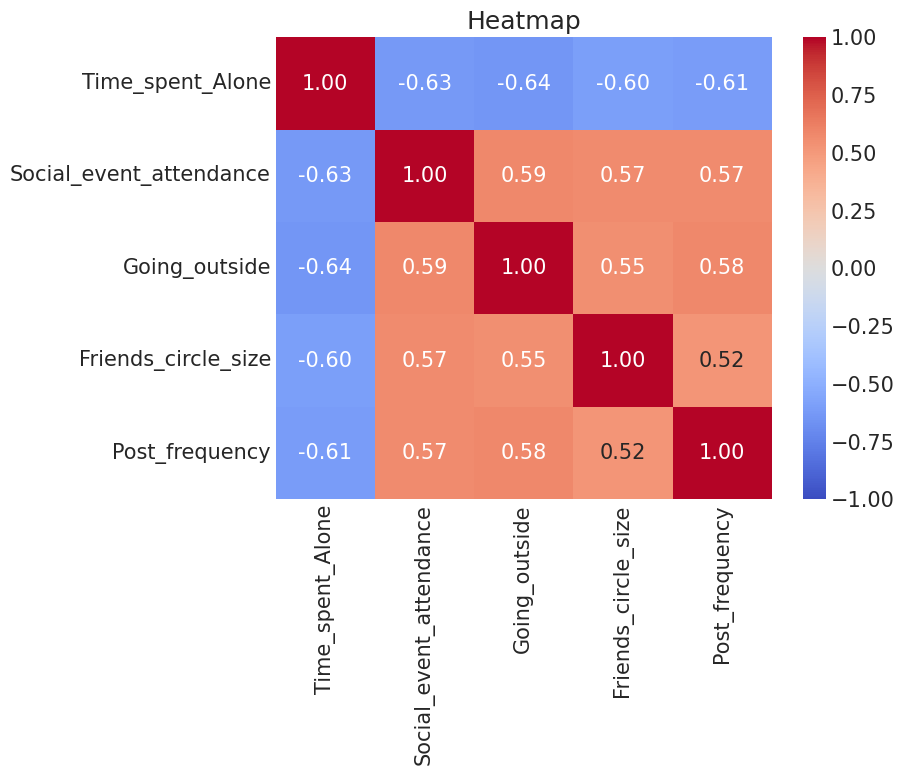

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap')
plt.show()

From the heatmap above, we can observe that **Time_spent_Alone** is negatively correlated with the other features, while the other features are positively correlated with each other. Moreover, the correlation values among the features do not differ significantly.

**In the missing value imputation section below, features will be grouped based on their correlations. Then, the missing values within each group will be filled using the group's median or mode.**


### Missing Value Imputation

**In the following missing value imputation process, features are grouped based on the correlation analysis above. Then, missing values within each group are filled using the group's median or mode.**

When filling missing values, the training and test datasets are first combined and imputed together. This ensures that the imputed values reflect the shared characteristics of both datasets, minimizing discrepancies between training and testing phases.

First, we examine the missing value status of each feature.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
 9   match_p                    178 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
train_ID = train_df['id']
test_ID = test_df['id']

#Now drop the  'id' colum since it's unnecessary for  the prediction process.
train_df.drop("id", axis = 1, inplace = True)
test_df.drop("id", axis = 1, inplace = True)

ntrain = train_df.shape[0] 
ntest = test_df.shape[0] 
y_train = train_df['Personality'].map({'Extrovert': 1, 'Introvert': 0}).values 

all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['Personality'], axis=1, inplace=True)

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           23084 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    23122 non-null  float64
 3   Going_outside              22767 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        23295 non-null  float64
 6   Post_frequency             23027 non-null  float64
 7   match_p                    236 non-null    object 
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


**1. Imputing Missing Values for Time_spent_Alone**

Based on the correlation analysis, we know that **Time_spent_Alone** is inversely related to **Social_event_attendance**.  
Therefore, we divide **Social_event_attendance** into four groups using its 1/4, 1/2 (median), and 3/4 quantiles.  
Then, we fill the missing values of **Time_spent_Alone** within each group accordingly.


In [10]:
# 1. Create a new grouping column based on the quartiles of Social_event_attendance
all_data['social_attend_bin'] = pd.qcut(
    all_data['Social_event_attendance'], 
    q=[0, 0.25, 0.5, 0.75, 1.0], 
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)


# 2. Define a function to fill missing values in Time\_spent\_Alone with the median within each group
def fill_by_group_median(df, group_col, target_col):
    return df[target_col].fillna(df.groupby(group_col)[target_col].transform('median'))

# 3.Perform group-wise filling of missing values
all_data['Time_spent_Alone'] = fill_by_group_median(
    all_data, group_col='social_attend_bin', target_col='Time_spent_Alone'
)


all_data.drop(columns=['social_attend_bin'], inplace=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24648 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    23122 non-null  float64
 3   Going_outside              22767 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        23295 non-null  float64
 6   Post_frequency             23027 non-null  float64
 7   match_p                    236 non-null    object 
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


It can be observed that **Time_spent_Alone** still has missing values because the rows with these missing values have both **Time_spent_Alone** and **Social_event_attendance** missing. Therefore, these missing values cannot be imputed based on **Social_event_attendance**.

Fortunately, **Going_outside** is also correlated with **Time_spent_Alone**, so the same method is applied to fill the missing values of **Time_spent_Alone** using **Going_outside**.


In [11]:
# 1. Create a new grouping column based on the quartiles of Social_event_attendance
all_data['Going_outside_bin'] = pd.qcut(
    all_data['Going_outside'], 
    q=[0, 0.25, 0.5, 0.75, 1.0], 
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)


# 2. Define a function to fill missing values in Time\_spent\_Alone with the median within each group
def fill_by_group_median(df, group_col, target_col):
    return df[target_col].fillna(df.groupby(group_col)[target_col].transform('median'))

# 3. Perform group-wise filling of missing values
all_data['Time_spent_Alone'] = fill_by_group_median(
    all_data, group_col='Going_outside_bin', target_col='Time_spent_Alone'
)


all_data.drop(columns=['Going_outside_bin'], inplace=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24699 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    23122 non-null  float64
 3   Going_outside              22767 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        23295 non-null  float64
 6   Post_frequency             23027 non-null  float64
 7   match_p                    236 non-null    object 
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


At this point, the missing values in **Time_spent_Alone** have been fully imputed.

1. **2. Imputing Missing Values for Social_event_attendance**

Based on the correlation analysis, **Social_event_attendance** has a strong positive correlation with **Going_outside**.  
Therefore, we divide **Going_outside** into four groups according to its 1/4 quantile, median (1/2 quantile), and 3/4 quantile.  
Then, we fill the missing values of **Social_event_attendance** within each group accordingly.

In [12]:
# 1. Create a new grouping column based on the quartiles of Social_event_attendance
all_data['Going_outside_bin'] = pd.qcut(
    all_data['Going_outside'], 
    q=[0, 0.25, 0.5, 0.75, 1.0], 
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)


# 2. Define a function to fill missing values in Time\_spent\_Alone with the median within each group
def fill_by_group_median(df, group_col, target_col):
    return df[target_col].fillna(df.groupby(group_col)[target_col].transform('median'))

# 3. Perform group-wise filling of missing values
all_data['Social_event_attendance'] = fill_by_group_median(
    all_data, group_col='Going_outside_bin', target_col='Social_event_attendance'
)


all_data.drop(columns=['Going_outside_bin'], inplace=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24699 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    24637 non-null  float64
 3   Going_outside              22767 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        23295 non-null  float64
 6   Post_frequency             23027 non-null  float64
 7   match_p                    236 non-null    object 
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


Based on the correlation analysis, **Social_event_attendance** has a strong positive correlation with **Friends_circle_size**.  
Therefore, we divide **Friends_circle_size** into four groups using its 1/4 quantile, median (1/2 quantile), and 3/4 quantile.  
Then, we fill the missing values of **Social_event_attendance** within each group accordingly.

In [13]:
# 1. Create a new grouping column based on the quartiles of Social_event_attendance
all_data['Friends_circle_bin'] = pd.qcut(
    all_data['Friends_circle_size'], 
    q=[0, 0.25, 0.5, 0.75, 1.0], 
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)


# 2. Define a function to fill missing values in Time\_spent\_Alone with the median within each group
def fill_by_group_median(df, group_col, target_col):
    return df[target_col].fillna(df.groupby(group_col)[target_col].transform('median'))

# 3. Perform group-wise filling of missing values
all_data['Social_event_attendance'] = fill_by_group_median(
    all_data, group_col='Friends_circle_bin', target_col='Social_event_attendance'
)


all_data.drop(columns=['Friends_circle_bin'], inplace=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24699 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    24696 non-null  float64
 3   Going_outside              22767 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        23295 non-null  float64
 6   Post_frequency             23027 non-null  float64
 7   match_p                    236 non-null    object 
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


Based on the correlation analysis, **Social_event_attendance** has a strong positive correlation with **Post_frequency**.  
Therefore, we divide **Post_frequency** into four groups using its 1/4 quantile, median (1/2 quantile), and 3/4 quantile.  
Then, we fill the missing values of **Social_event_attendance** within each group accordingly.

In [14]:
# 1. Create a new grouping column based on the quartiles of Social_event_attendance
all_data['Post_frequency_bin'] = pd.qcut(
    all_data['Post_frequency'], 
    q=[0, 0.25, 0.5, 0.75, 1.0], 
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)


# 2. Define a function to fill missing values in Time\_spent\_Alone with the median within each group

def fill_by_group_median(df, group_col, target_col):
    return df[target_col].fillna(df.groupby(group_col)[target_col].transform('median'))

# 3. Perform group-wise filling of missing values
all_data['Social_event_attendance'] = fill_by_group_median(
    all_data, group_col='Post_frequency_bin', target_col='Social_event_attendance'
)

all_data.drop(columns=['Post_frequency_bin'], inplace=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24699 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    24699 non-null  float64
 3   Going_outside              22767 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        23295 non-null  float64
 6   Post_frequency             23027 non-null  float64
 7   match_p                    236 non-null    object 
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


**3. Imputing Missing Values for Going_outside, Friends_circle_size, and Post_frequency**

The missing values of **Going_outside**, **Friends_circle_size**, and **Post_frequency** are filled using the same method as above.

In [15]:
def fill_missing_by_quantile_group(df, group_source_col, target_col, quantiles=[0, 0.25, 0.5, 0.75, 1.0], labels=None):
    """
        Fill missing values in `target_col` by grouping based on the quantiles of `group_source_col`, and using the median of each group to impute missing values.
        
        **Parameters:**
        - `df` (`pd.DataFrame`): The original dataset
        - `group_source_col` (`str`): The numeric column used for grouping
        - `target_col` (`str`): The target column with missing values to be filled
        - `quantiles` (`list`): Quantile breakpoints for grouping (default is quartiles)
        - `labels` (`list`): Labels for each group (default is auto-generated as Q1/Q2/...)
        
        **Returns:**
        - `pd.DataFrame`: The DataFrame with missing values filled (modifies in place)

    """
    # Automatically Generate Group Labels
    if labels is None:
        labels = [f'Q{i+1}' for i in range(len(quantiles)-1)]

    temp_bin_col = f'{group_source_col}_bin'

    # Step 1: Create Grouping Column
    df[temp_bin_col] = pd.qcut(df[group_source_col], q=quantiles, labels=labels)

    # Step 2: Fill Missing Values Within Groups Using the Median
    df[target_col] = df[target_col].fillna(df.groupby(temp_bin_col)[target_col].transform('median'))

    # Step 3: Delete Temporary Columns
    df.drop(columns=[temp_bin_col], inplace=True)

    return df

all_data = fill_missing_by_quantile_group(
    df=all_data,
    group_source_col='Social_event_attendance',
    target_col='Going_outside'
)

all_data = fill_missing_by_quantile_group(
    df=all_data,
    group_source_col='Post_frequency',
    target_col='Friends_circle_size'
)
all_data = fill_missing_by_quantile_group(
    df=all_data,
    group_source_col='Going_outside',
    target_col='Friends_circle_size'
)
all_data = fill_missing_by_quantile_group(
    df=all_data,
    group_source_col='Friends_circle_size',
    target_col='Post_frequency'
)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24699 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    24699 non-null  float64
 3   Going_outside              24699 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        24699 non-null  float64
 6   Post_frequency             24699 non-null  float64
 7   match_p                    236 non-null    object 
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


**4. Imputing Missing Values for Stage_fear and Drained_after_socializing**

According to the feature analysis, **Stage_fear** and **Drained_after_socializing** have a significant impact on the target variable **Personality**.  
If we fill their missing values using group-based methods as before, it may lead to incorrect imputations.  
Therefore, we assign the value **"Unknown"** to the missing entries in these two features.  
This way, when **Stage_fear** or **Drained_after_socializing** is "Unknown", the final prediction will rely more on the other features.


In [16]:
all_data.fillna({
    'Stage_fear': 'UnKnow',
    'Drained_after_socializing': 'UnKnow'
}, inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24699 non-null  float64
 1   Stage_fear                 24699 non-null  object 
 2   Social_event_attendance    24699 non-null  float64
 3   Going_outside              24699 non-null  float64
 4   Drained_after_socializing  24699 non-null  object 
 5   Friends_circle_size        24699 non-null  float64
 6   Post_frequency             24699 non-null  float64
 7   match_p                    236 non-null    object 
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


### Feature Engineering

Outlier removal is performed to prevent abnormal values from negatively impacting model training.


**1. Boxplot**

Use boxplots to visually inspect the distribution of each feature and identify potential outliers.


<Axes: title={'center': 'Boxplot'}>

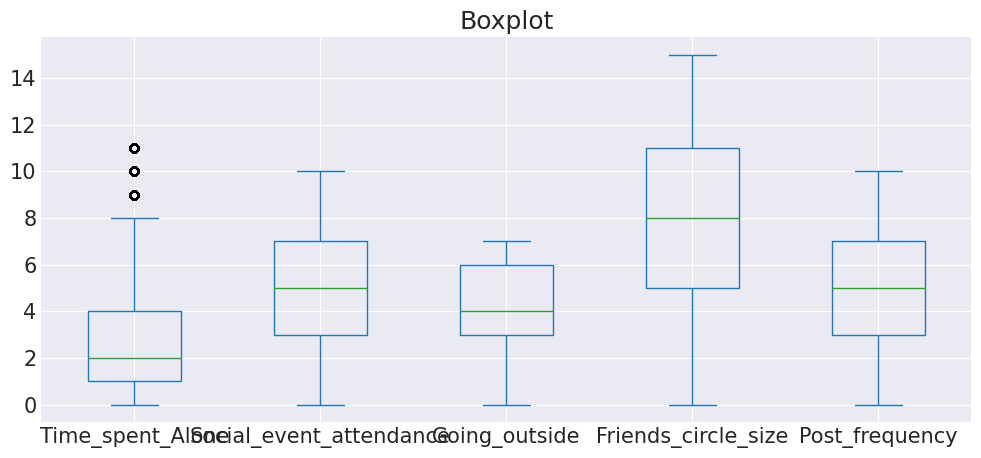

In [17]:
numeric_all_data = all_data.select_dtypes(include='number')
numeric_all_data.plot(kind='box', title='Boxplot', figsize=(12, 5))

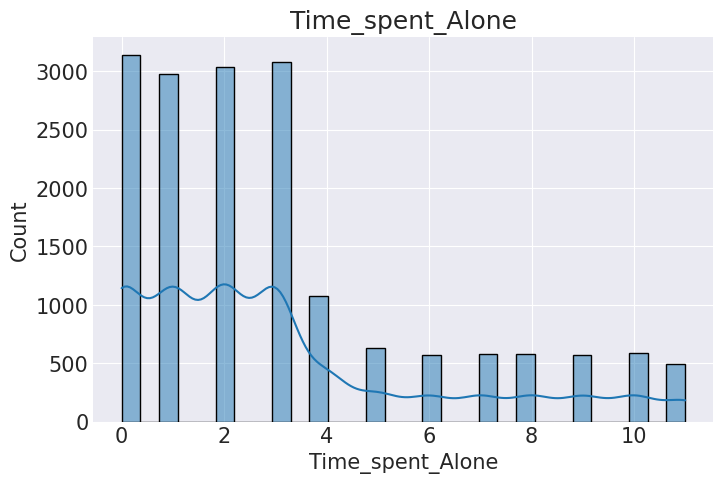

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Time_spent_Alone'], bins=30, kde=True)
plt.title("Time_spent_Alone")
plt.xlabel("Time_spent_Alone")
plt.show()

### Handling Categorical Features

Convert categorical features to one-hot encoding(experiments have shown that one-hot encoding yields better results).

In [19]:
all_data = pd.get_dummies(all_data, columns=['Stage_fear', 'Drained_after_socializing','match_p'], prefix=['Stage', 'Drained','match'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_spent_Alone         24699 non-null  float64
 1   Social_event_attendance  24699 non-null  float64
 2   Going_outside            24699 non-null  float64
 3   Friends_circle_size      24699 non-null  float64
 4   Post_frequency           24699 non-null  float64
 5   Stage_No                 24699 non-null  bool   
 6   Stage_UnKnow             24699 non-null  bool   
 7   Stage_Yes                24699 non-null  bool   
 8   Drained_No               24699 non-null  bool   
 9   Drained_UnKnow           24699 non-null  bool   
 10  Drained_Yes              24699 non-null  bool   
 11  match_Extrovert          24699 non-null  bool   
 12  match_Introvert          24699 non-null  bool   
dtypes: bool(8), float64(5)
memory usage: 1.1 MB


In [20]:
all_data.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_No,Stage_UnKnow,Stage_Yes,Drained_No,Drained_UnKnow,Drained_Yes,match_Extrovert,match_Introvert
0,0.0,6.0,4.0,15.0,5.0,True,False,False,True,False,False,False,False
1,1.0,7.0,3.0,10.0,8.0,True,False,False,True,False,False,False,False
2,6.0,1.0,0.0,3.0,0.0,False,False,True,False,True,False,False,False
3,3.0,7.0,3.0,11.0,5.0,True,False,False,True,False,False,False,False
4,1.0,4.0,4.0,13.0,6.0,True,False,False,True,False,False,False,False


# Model Training

Here, we choose six commonly used models for **classification problems**:

- **L1-regularized Logistic Regression**  
  This model applies L1 regularization to logistic regression, which can perform feature selection and is useful when dealing with high-dimensional data. We use `RobustScaler` for normalization to reduce the impact of outliers.

- **Elastic Net Logistic Regression**  
  A regularized classification method that combines both L1 and L2 penalties, offering a balance between sparsity and stability.

- **Support Vector Machine (SVM) with kernel**  
  A powerful classification algorithm that can model non-linear decision boundaries by using kernel functions, making it effective for complex datasets.

- **Gradient Boosting Classifier**  
  A tree-based ensemble classifier trained using gradient boosting. We use the log-loss (cross-entropy) function, which is suitable for binary or multi-class classification and more robust to outliers.

- **XGBoost Classifier**  
  An efficient and scalable gradient boosting framework optimized for classification tasks. It supports regularization and handles missing values well.

- **LightGBM Classifier**  
  A fast and high-performance gradient boosting framework for classification. It is based on decision trees and optimized for speed and memory usage, suitable for large-scale datasets


### Model Selection and Ensemble Prediction

In this section, we select different machine learning models and perform ensemble prediction to improve overall performance. By combining the strengths of various models, the ensemble approach aims to achieve more robust and accurate predictions.


In [21]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')



X_train = all_data[:ntrain]
X_test = all_data[ntrain:]
X=X_train
y=y_train

In [22]:
class_0 = y_train.sum()
class_1 = len(y_train) - class_0
scale_pos_weight = class_1 / class_0

In [23]:
xgb = XGBClassifier(
    max_depth=4,         
    learning_rate=0.01,   
    n_estimators=1000,    
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    class_weights=[scale_pos_weight, 1],
    random_seed=42,
    verbose=0
)

lgbm = LGBMClassifier(
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight={0: scale_pos_weight, 1: 1},
    random_state=42
)

In [24]:
# Create ensemble
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('cat', cat),
        ('lgbm', lgbm)
    ],
    voting='soft'
)

In [25]:
# Train with validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
ensemble.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 10959, number of negative: 3860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.889634 -> initscore=2.087006
[LightGBM] [Info] Start training from score 2.087006


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7e2f36975350>),
                             ('lgbm',
                              LGBMClassifier(class_weight={0: 0.35221549018176507,
                                                           1: 1},
                                             colsample_bytree=0.8,
                                             n_estimators=300, random_state=42,
                                             subsample=0.8))],
                 voting='soft')

In [26]:
# Optimize threshold
val_probs = ensemble.predict_proba(X_val)[:, 1]
best_threshold = 0.5
best_acc = 0

for threshold in np.arange(0.4, 0.6, 0.01):
    preds = (val_probs >= threshold).astype(int)


In [27]:
test_probs = ensemble.predict_proba(X_test)[:, 1]
test_preds = (test_probs >= best_threshold).astype(int)

# Create submission
submission = pd.DataFrame({
    'id': test_ID,
    'Personality': test_preds
})
print(submission.head())
submission['Personality'] = submission['Personality'].map({1: 'Extrovert', 0: 'Introvert'})
submission.to_csv('submission.csv', index=False)
print("Submitted successfully with XGBoost")

      id  Personality
0  18524            1
1  18525            0
2  18526            1
3  18527            1
4  18528            0
Submitted successfully with XGBoost


In [28]:
# import pandas as pd
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# X_train = all_data[:ntrain]
# X_test = all_data[ntrain:]

# xgb_params = {
#     'max_depth': [4],
#     'learning_rate': [0.01],
#     'n_estimators': [1000],
#     'subsample': [0.8],
#     'colsample_bytree': [0.8]
# }


# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


# xgb_cv = GridSearchCV(xgb_model, xgb_params, cv=5, n_jobs=-1, verbose=1)
# xgb_cv.fit(X_train, y_train)


# xgb_pred = xgb_cv.predict(X_test)


# kaggle = pd.DataFrame({'id': test_ID, 'Personality': xgb_pred})
# kaggle['Personality'] = kaggle['Personality'].map({1: 'Extrovert', 0: 'Introvert'})


# kaggle.to_csv('submission.csv', index=False)
# print("Submitted successfully with XGBoost")
